In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import plot_importance

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import pickle

In [6]:
loc1 = '/home/gato/Scripts/DS/MachineLearning/dataAndPickles/churnModeling.csv'
loc2 = '/home/gato/Scripts/DS/MachineLearning/data/churn.csv'

In [7]:
df = pd.read_csv(loc1)

In [8]:
## I cleaned the data already.
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Loyalty            10000 non-null  float64
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


In [10]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Loyalty',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [11]:
## Splitting the data
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Loyalty',
       'Geography_Germany', 'Geography_Spain']]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    stratify=y, 
                                                    random_state=42)

In [35]:

## Modeling

## they are more params to adjust
cv_params = {
    "learning_rate": [0.03, 0.05, 0.1, 0.3],
    "max_depth": [4, 5, 6, 7, 8],
    "min_child_weight": [1, 3, 5, 6, 7, ],
    "n_estimators": [50, 100, 125],
}
## instantiate the classifier binary class that output logistic probability
## different problem different objective.
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

## Scores
scoring = ['accuracy', 'precision', 'recall', 'f1']

## Instantiate the Grid search with the model that has the best avg F1
## score when done.
#xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [36]:
#%%time
## fitting the model, commented when pickled.
#xgb_cv.fit(X_train, y_train)

CPU times: user 51min 16s, sys: 31.8 s, total: 51min 48s
Wall time: 4min 30s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.03, 0.05, 0.1, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 3, 5, 6, 7],
                         'n_estimators': [50, 100, 125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [12]:
## pickle the model:
## 1. #comment %%time and the fit of the model
## Pickles path
ppath = '/home/gato/Scripts/DS/MachineLearning/dataAndPickles/'
# Pickle the model
#with open(ppath+'xgb_cv_model.pickle', 'wb') as to_write:
    #pickle.dump(xgb_cv, to_write)


### Opening models

In [13]:
## un-pickle & open the models from the model area
with open(ppath + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [14]:
## xgb_cv_model.pickle
with open(ppath + 'xgb_cv_model.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

In [15]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [16]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 100}

In [17]:
## BEst Scores, we used `f1`
print(rf_cv.best_score_)
print(xgb_cv.best_score_)

0.5813676103635199
0.5837719100994183


In [58]:
def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.loc[cv_results['mean_test_f1'].idxmax()]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results['mean_test_f1']
    recall = best_estimator_results['mean_test_recall']
    precision = best_estimator_results['mean_test_precision']
    accuracy = best_estimator_results['mean_test_accuracy']

    # Create table of results
    table = pd.DataFrame({
        'Model': model_name,
        'F1': f1,
        'Recall': recall,
        'Precision': precision,
        'Accuracy': accuracy
    }, index=[0])

    return table

xgb_cv_results = make_results('XGBoost CV', xgb_cv)
rf_cv_results = make_results('Random Forest CV', rf_cv)


In [59]:
# Read in master results table

results = pd.read_csv(ppath+'results1.csv', index_col=0)
results

,Model,F1,Recall,Precision,Accuracy
0,tunedDecisionTree,0.511772,0.443737,0.608755,0.8284


In [60]:
results = pd.concat([xgb_cv_results, results])

In [63]:
results = pd.concat([rf_cv_results, results])

In [64]:
results.to_csv(ppath+'results1.csv', index=False)

### Predicting on the test data

We're ready to select a champion model! Based on the above table, it's clear that our XGBoost model has the top F1 score on the validation data by a small margin. 

Since we won't be building any more models, we can at last use our champion model (XGBoost) to predict on the test data. 

In [18]:
# Predict on test data
xgb_cv_preds = xgb_cv.predict(X_test)
print('F1 score final XGB model: ', f1_score(y_test, xgb_cv_preds))
print('Recall score final XGB model: ', recall_score(y_test, xgb_cv_preds))
print('Precision score final XGB model: ', precision_score(y_test, xgb_cv_preds))
print('Accuracy score final XGB model: ', accuracy_score(y_test, xgb_cv_preds))

F1 score final XGB model:  0.6009501187648455
Recall score final XGB model:  0.49705304518664045
Precision score final XGB model:  0.7597597597597597
Accuracy score final XGB model:  0.8656


In [19]:
# Create helper function to plot confusion matrix
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()

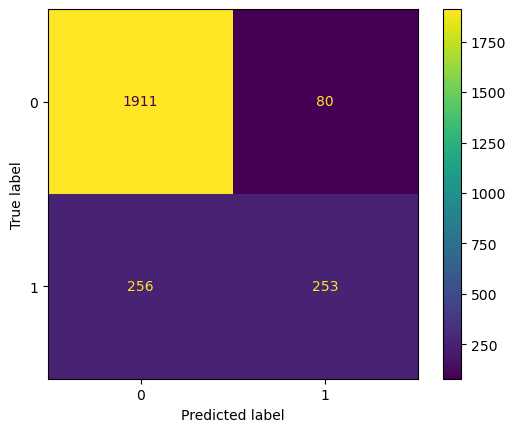

In [20]:
conf_matrix_plot(xgb_cv, X_test, y_test)

From the 2,500 people in our test data, there are 509 customers who left the bank. Of those, our model captures 256. The confusion matrix indicates that, when the model makes an error, it’s usually a Type II error&mdash;it gives a false negative by failing to predict that a customer will leave. On the other hand, it makes far fewer Type I errors, which are false positives.

Ultimately, whether these results are acceptable depends on the costs of the measures taken to prevent a customer from leaving versus the value of retaining them. In this case, bank leaders may decide that they’d rather have more true positives, even if it means also capturing significantly more false positives. If so, perhaps optimizing the models based on their F1 scores is insufficient. Maybe we’d prioritize a different evaluation metric. 

One way to modify the decision-making without retraining the model is to adjust the threshold at which the model predicts a positive response. In other words, the model determines a probability that a given customer will churn. By default, if that probability is ≥ 0.50, then the model will label that customer as churned. Probabilities of < 0.50 would designate a non-responder. But it's possible to adjust this decision threshold. For instance, if we set the threshold to 0.25, then the model would label customers with predicted probabilities ≥ 0.25 as churned, and those with probabilities < 0.25 as not churned. This would increase the recall of the model, but decrease the accuracy. 

In any case, what is certain is that our model helps the bank. Consider the results if decision-makers had done nothing. In that case, they’d expect to lose 509 customers. Alternatively, they could give everybody an incentive to stay. That would cost the bank for each of the 2,500 customers in our test set. Finally, the bank could give incentives at random&mdash;say, by flipping a coin. Doing this would incentivize about the same number of true responders as our model selects. But the bank would lose a lot of money offering the incentives to people who aren’t likely to leave, and our model is very good at identifying these customers. 




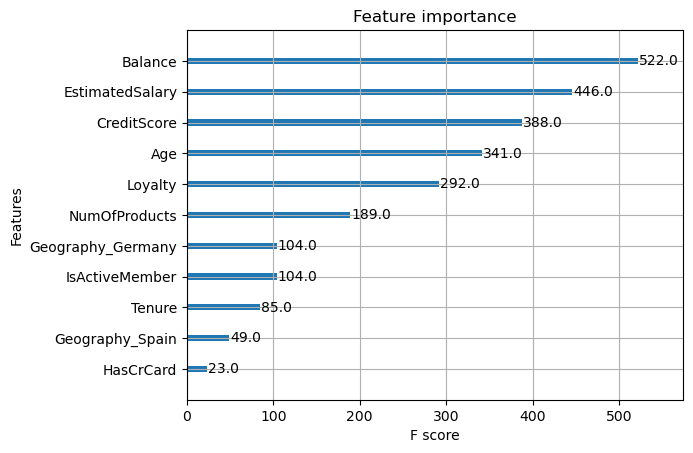

In [21]:
plot_importance(xgb_cv.best_estimator_);

This tells us that the four most important features used by our model were `Balance`, `EstimatedSalary`,`CreditScore`, and `Age`. This is very useful information. In a full project, we'd go back and examine these features very closely to understand how and why they are affecting churn. 

At this point, it would also be a good idea to go back and add the model predictions and `Gender` feature to each sample in our data. Then we could examine how evenly the model distributes its error across reported gender identities.



## A reminder about modeling trade-offs

Remember, the decision to use only the champion model to predict on the test data comes with a trade-off. The benefit is that we get a true idea of how we'd expect the model to perform on new, unseen data. The cost of this decision is that, by using the validation scores to both tune hyperparamters _and_ select the champion model, we run the risk of selecting the model that most overfit the validation data. 

Alternatively, we could have selected our champion model by using all of our tuned models to predict on the test data and choosing the one that performed best. That also would have come with a trade-off. There wouldn't be as much risk of overfitting to the validation data, but by using the test data to select our champion model, we wouldn't get a truly objective idea of how the model would perform on new, unseen data. We would need a new dataset for that, which means we would have had to set more data aside at the beginning, resulting in less data to use to train the model. 

With sufficient data, a more rigorous approach would be:

1. Split the data into training, validation, and test sets
2. Tune hyperparameters using cross-validation on the training set
3. Use _all_ tuned models to predict on the validation set
4. Select a champion model based on performance on the validation set
5. Use champion model alone to predict on test data

Every modeling decision comes with a trade-off. What's most important is that you're aware of the trade-offs and apply the best reasoning to the task at hand.

## More rigorous approach:

<img src="./optimal_model_flow.svg"/>